In [1]:
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from neuralnetwork import NeuralNetwork

In [2]:
# Run only if you need to install nltk.corpus and nltk.stem
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
# Read the data set and parse independent lines
fd = open("Assignment_2_data.txt","r")
file_data = fd.read()
lines = (file_data).splitlines()

In [4]:
# Create Necessary objects
ps = PorterStemmer()
y_target_names = []
x = []
stop_words = set(stopwords.words('english'))
unique_tokens = set()

In [5]:
# Pasing input file into labels and features 
for i in range(len(lines)): 
    # Splitting based on white space and non alpha numberic characters
    words_tokens = re.split('\W+',lines[i])
    words_tokens = list(filter(lambda temp: (temp != '' ),words_tokens)) 
    
    # Removing stop word from the data
    filtered_sentence = []
    for w in words_tokens:
        if w not in stop_words:
        # Applying porter stemmer
            stemmed_word = ps.stem(w).lower()
            filtered_sentence.append(stemmed_word)


    # Store pre processed data in x and y_target_names
    y_target_names.append(filtered_sentence[0])
    x.append(filtered_sentence[1:])
    unique_tokens.update(filtered_sentence[1:])

In [6]:
# Declare variables for one hot encoding
N = len(x)
unique_tokens = list(unique_tokens)
encoding_length = (len(unique_tokens))
x_encoded = np.zeros( ( N , encoding_length) )


In [7]:
# Binary encoding of features and labels
for i in range(N):
    for j in x[i]:
        ind = unique_tokens.index(j)
        x_encoded[i][ind] = 1;
        
y_target = np.zeros((N,1))
for i in range(len(y_target_names)):
    if(y_target_names[i] == "ham"):
        y_target[i] = 1

In [8]:
# Split training and test error
trainN = int(0.8*N)

X_train = x_encoded[0:trainN]
y_train = y_target[0:trainN]

X_test = x_encoded[trainN:]
y_test = y_target[trainN:]

In [9]:
N,M = X_train.shape

In [10]:
# Using tanh activation function without softmax layer 2A1
nn = NeuralNetwork(M,np.array([100,50]),1)

In [11]:
nn.train(X_train,y_train,X_test,y_test,epochs=500,learning_rate=1e-1,learning_rate_decay=0.98)

-----------Ratio of Correct predictions over testset(525/1115)-----------
-----------Ratio of Correct predictions over training set(2108/4459)-----------
Epoch (1/500) Training Error : 0.495623
Epoch (2/500) Training Error : 0.461137
Epoch (3/500) Training Error : 0.422321
Epoch (4/500) Training Error : 0.375333
Epoch (5/500) Training Error : 0.324564
Epoch (6/500) Training Error : 0.276870
Epoch (7/500) Training Error : 0.236847
Epoch (8/500) Training Error : 0.205189
Epoch (9/500) Training Error : 0.180693
Epoch (10/500) Training Error : 0.161835
Epoch (11/500) Training Error : 0.147178
Epoch (12/500) Training Error : 0.135495
Epoch (13/500) Training Error : 0.125841
Epoch (14/500) Training Error : 0.117549
Epoch (15/500) Training Error : 0.110187
Epoch (16/500) Training Error : 0.103496
Epoch (17/500) Training Error : 0.097340
Epoch (18/500) Training Error : 0.091658
Epoch (19/500) Training Error : 0.086423
Epoch (20/500) Training Error : 0.081609
Epoch (21/500) Training Error : 0.0

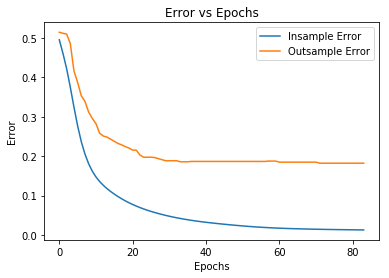

In [12]:
nn.plot()

In [13]:
# Sigmoid without softmax layer 2A2
nn2 = NeuralNetwork(M,np.array([100,50]),1,activation_function="sigmoid",weight_scale=1)

In [14]:
nn2.train(X_train,y_train,X_test,y_test,epochs=500,learning_rate=2e-1,learning_rate_decay=0.98)

-----------Ratio of Correct predictions over testset(205/1115)-----------
-----------Ratio of Correct predictions over training set(856/4459)-----------
Epoch (1/500) Training Error : 0.588705
Epoch (2/500) Training Error : 0.551163
Epoch (3/500) Training Error : 0.546301
Epoch (4/500) Training Error : 0.544381
Epoch (5/500) Training Error : 0.542618
Epoch (6/500) Training Error : 0.540689
Epoch (7/500) Training Error : 0.538593
Epoch (8/500) Training Error : 0.536370
Epoch (9/500) Training Error : 0.534055
Epoch (10/500) Training Error : 0.531670
Epoch (11/500) Training Error : 0.529232
Epoch (12/500) Training Error : 0.526747
Epoch (13/500) Training Error : 0.524222
Epoch (14/500) Training Error : 0.521659
Epoch (15/500) Training Error : 0.519058
Epoch (16/500) Training Error : 0.516420
Epoch (17/500) Training Error : 0.513743
Epoch (18/500) Training Error : 0.511028
Epoch (19/500) Training Error : 0.508273
Epoch (20/500) Training Error : 0.505477
Epoch (21/500) Training Error : 0.50

Epoch (173/500) Training Error : 0.280938
Epoch (174/500) Training Error : 0.280383
Epoch (175/500) Training Error : 0.279838
-----------Ratio of Correct predictions over testset(888/1115)-----------
-----------Ratio of Correct predictions over training set(3574/4459)-----------
Epoch (176/500) Training Error : 0.279303
Epoch (177/500) Training Error : 0.278773
Epoch (178/500) Training Error : 0.278248
Epoch (179/500) Training Error : 0.277727
Epoch (180/500) Training Error : 0.277210
Epoch (181/500) Training Error : 0.276697
Epoch (182/500) Training Error : 0.276188
Epoch (183/500) Training Error : 0.275684
Epoch (184/500) Training Error : 0.275184
Epoch (185/500) Training Error : 0.274687
Epoch (186/500) Training Error : 0.274195
Epoch (187/500) Training Error : 0.273707
Epoch (188/500) Training Error : 0.273222
Epoch (189/500) Training Error : 0.272742
Epoch (190/500) Training Error : 0.272265
Epoch (191/500) Training Error : 0.271792
Epoch (192/500) Training Error : 0.271323
Epoch 

Epoch (343/500) Training Error : 0.227564
Epoch (344/500) Training Error : 0.227373
Epoch (345/500) Training Error : 0.227183
Epoch (346/500) Training Error : 0.226993
Epoch (347/500) Training Error : 0.226804
Epoch (348/500) Training Error : 0.226616
Epoch (349/500) Training Error : 0.226428
Epoch (350/500) Training Error : 0.226241
-----------Ratio of Correct predictions over testset(905/1115)-----------
-----------Ratio of Correct predictions over training set(3668/4459)-----------
Epoch (351/500) Training Error : 0.226058
Epoch (352/500) Training Error : 0.225876
Epoch (353/500) Training Error : 0.225695
Epoch (354/500) Training Error : 0.225514
Epoch (355/500) Training Error : 0.225334
Epoch (356/500) Training Error : 0.225154
Epoch (357/500) Training Error : 0.224975
Epoch (358/500) Training Error : 0.224796
Epoch (359/500) Training Error : 0.224618
Epoch (360/500) Training Error : 0.224441
Epoch (361/500) Training Error : 0.224265
Epoch (362/500) Training Error : 0.224088
Epoch 

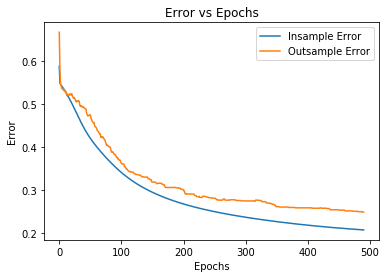

In [15]:
nn2.plot()

In [25]:
# Using sigmoid activation function with softmax layer 2B1
nn = NeuralNetwork(M,np.array([100,50]),2,activation_function="sigmoid",weight_scale=1)

In [26]:
nn.train(X_train,y_train,X_test,y_test,epochs=1000,learning_rate=2e-1,learning_rate_decay=0.98,method="two")

-----------Ratio of Correct predictions over testset(441/1115)-----------
-----------Ratio of Correct predictions over training set(1825/4459)-----------
Epoch (1/1000) Training Error : 0.582590
Epoch (2/1000) Training Error : 0.555256
Epoch (3/1000) Training Error : 0.546785
Epoch (4/1000) Training Error : 0.542706
Epoch (5/1000) Training Error : 0.539818
Epoch (6/1000) Training Error : 0.537279
Epoch (7/1000) Training Error : 0.534828
Epoch (8/1000) Training Error : 0.532373
Epoch (9/1000) Training Error : 0.529875
Epoch (10/1000) Training Error : 0.527323
Epoch (11/1000) Training Error : 0.524712
Epoch (12/1000) Training Error : 0.522044
Epoch (13/1000) Training Error : 0.519325
Epoch (14/1000) Training Error : 0.516561
Epoch (15/1000) Training Error : 0.513761
Epoch (16/1000) Training Error : 0.510934
Epoch (17/1000) Training Error : 0.508088
Epoch (18/1000) Training Error : 0.505230
Epoch (19/1000) Training Error : 0.502366
Epoch (20/1000) Training Error : 0.499501
Epoch (21/1000)

Epoch (169/1000) Training Error : 0.286069
Epoch (170/1000) Training Error : 0.285325
Epoch (171/1000) Training Error : 0.284594
Epoch (172/1000) Training Error : 0.283877
Epoch (173/1000) Training Error : 0.283174
Epoch (174/1000) Training Error : 0.282486
Epoch (175/1000) Training Error : 0.281817
-----------Ratio of Correct predictions over testset(873/1115)-----------
-----------Ratio of Correct predictions over training set(3600/4459)-----------
Epoch (176/1000) Training Error : 0.281170
Epoch (177/1000) Training Error : 0.280536
Epoch (178/1000) Training Error : 0.279916
Epoch (179/1000) Training Error : 0.279309
Epoch (180/1000) Training Error : 0.278713
Epoch (181/1000) Training Error : 0.278130
Epoch (182/1000) Training Error : 0.277558
Epoch (183/1000) Training Error : 0.276996
Epoch (184/1000) Training Error : 0.276445
Epoch (185/1000) Training Error : 0.275904
Epoch (186/1000) Training Error : 0.275373
Epoch (187/1000) Training Error : 0.274850
Epoch (188/1000) Training Err

Epoch (335/1000) Training Error : 0.226124
Epoch (336/1000) Training Error : 0.225813
Epoch (337/1000) Training Error : 0.225502
Epoch (338/1000) Training Error : 0.225192
Epoch (339/1000) Training Error : 0.224881
Epoch (340/1000) Training Error : 0.224571
Epoch (341/1000) Training Error : 0.224262
Epoch (342/1000) Training Error : 0.223953
Epoch (343/1000) Training Error : 0.223645
Epoch (344/1000) Training Error : 0.223338
Epoch (345/1000) Training Error : 0.223032
Epoch (346/1000) Training Error : 0.222727
Epoch (347/1000) Training Error : 0.222423
Epoch (348/1000) Training Error : 0.222121
Epoch (349/1000) Training Error : 0.221820
Epoch (350/1000) Training Error : 0.221521
-----------Ratio of Correct predictions over testset(903/1115)-----------
-----------Ratio of Correct predictions over training set(3714/4459)-----------
Epoch (351/1000) Training Error : 0.221230
Epoch (352/1000) Training Error : 0.220940
Epoch (353/1000) Training Error : 0.220651
Epoch (354/1000) Training Err

Epoch (501/1000) Training Error : 0.195700
Epoch (502/1000) Training Error : 0.195600
Epoch (503/1000) Training Error : 0.195500
-----------Ratio of Correct predictions over testset(921/1115)-----------
-----------Ratio of Correct predictions over training set(3750/4459)-----------


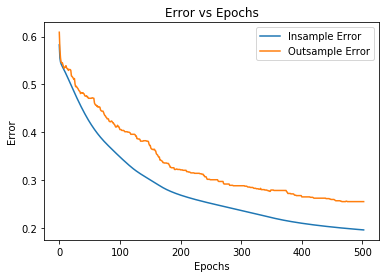

In [27]:
nn.plot()

In [19]:
# tanh activation function with softmax layer 2B2
nn2 = NeuralNetwork(M,np.array([100,50]),2)

In [20]:
nn2.train(X_train,y_train,X_test,y_test,epochs=500,learning_rate=2e-1,learning_rate_decay=0.98,method="two")

-----------Ratio of Correct predictions over testset(527/1115)-----------
-----------Ratio of Correct predictions over training set(2207/4459)-----------
Epoch (1/500) Training Error : 0.490918
Epoch (2/500) Training Error : 0.460585
Epoch (3/500) Training Error : 0.434676
Epoch (4/500) Training Error : 0.406889
Epoch (5/500) Training Error : 0.377831
Epoch (6/500) Training Error : 0.349701
Epoch (7/500) Training Error : 0.324289
Epoch (8/500) Training Error : 0.302401
Epoch (9/500) Training Error : 0.284059
Epoch (10/500) Training Error : 0.268872
Epoch (11/500) Training Error : 0.256333
Epoch (12/500) Training Error : 0.245956
Epoch (13/500) Training Error : 0.237312
Epoch (14/500) Training Error : 0.230029
Epoch (15/500) Training Error : 0.223800
Epoch (16/500) Training Error : 0.218387
Epoch (17/500) Training Error : 0.213615
Epoch (18/500) Training Error : 0.209361
Epoch (19/500) Training Error : 0.205537
Epoch (20/500) Training Error : 0.202078
Epoch (21/500) Training Error : 0.1

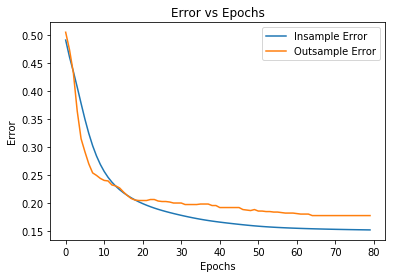

In [21]:
nn2.plot()